<center><h1> A fastai's Code First Approach to CycleGAN for Image Translation</h1></center>






* Special Thanks to [**Jeremy Howard**](https://www.fast.ai/) and [**tanishq abraham**](https://github.com/tmabraham) for fasinating libraries for CycleGan

Image-to-image translation involves generating a new synthetic version of a given image with a specific modification, such as famous example of translating a **horse to zebra.**
![kd](https://www.tensorflow.org/tutorials/generative/images/horse2zebra_1.png)

Training a model for image-to-image translation typically requires a large dataset of paired examples. These datasets can be difficult and expensive to prepare, and in some cases impossible.

* **A successful approach for unpaired image-to-image translation is CycleGAN.**

The CycleGAN is a technique that involves the automatic training of image-to-image translation models without paired examples. The models are trained in an unsupervised manner using a collection of images from the source and target domain that do not need to be related in any way.


***Image-to-image translation is a class of vision and graphics problems where the goal is to learn the mapping between an input image and an output image using a training set of aligned image pairs.***

* [**Translation using Cycle-Consistent Adversarial Networks, 2017**](https://arxiv.org/abs/1703.10593)





* **The CycleGAN is an extension of the GAN architecture that involves the simultaneous training of two generator models and two discriminator models.**

One generator takes images from the first domain as input and outputs images for the second domain, and the other generator takes images from the second domain as input and generates images for the first domain. Discriminator models are then used to determine how plausible the generated images are and update the generator models accordingly.

![kd](https://hardikbansal.github.io/CycleGANBlog/images/model.jpg)




# Applications of CycleGAN

* The CycleGAN approach is presented with many impressive applications.

**This Competition deals with Style Transfer.**

## Styel Transfer

* Style transfer refers to the learning of artistic style from one domain, often paintings, and applying the artistic style to another domain, such as photographs.

The below CycleGAN is demonstrated by applying the **artistic style from Monet, Van Gogh, Cezanne, and Ukiyo-e to photographs of landscapes.**

![kd](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Style-Transfer-from-Famous-Painters-to-Photographs-of-Landscapes.png)

[**Tanishq abraham**](https://github.com/tmabraham) Has built a very easy to use CycleGAN package integrated with fastai v2.

This is a package for training and testing unpaired image-to-image translation models. It currently only includes the CycleGAN model, but other models will be implemented in the future.

* This package uses **fastai** to accelerate deep learning experimentation.

* **The package uses torch 1.6.0, torchvision 0.7.0, fastai 2.0.0 (and its dependencies)**



## Lets Install and Load the Libraries first

In [ ]:
! nvidia-smi

In [ ]:
# !pip uninstall torch --y
# !pip uninstall torchvision --y
# !pip uninstall fastai --y

In [ ]:
# !pip install -q torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install -q fastai

In [4]:
import torch
print(torch.__version__)

1.7.1+cpu


In [2]:
torch.cuda.device_count()

0

In [20]:
torch.cuda.set_device(0)

AttributeError: module 'torch._C' has no attribute '_cuda_setDevice'

* set device to  cuda

In [3]:
!pip install -q git+https://github.com/tmabraham/UPIT.git

You should consider upgrading via the 'd:\projects\virtual env\tensorflow\scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import glob
import tqdm
import os
import PIL
from fastai.vision.all import *
from fastai.basics import *
from upit.models.cyclegan import *
from upit.inference.cyclegan import *
from upit.train.cyclegan import *
from upit.data.unpaired import *

In [5]:
import os
import sys
import gc
from PIL import Image as immg
import shutil

In [6]:
import warnings
warnings.filterwarnings("ignore")

* Path for Images

In [7]:
path = Path('./vangogh2photo');
for p in path.ls():
    print(p)

photo = path/'trainB'
vangogh = path/'trainA'

monet_files = get_image_files(vangogh)
photo_files = get_image_files(photo)

vangogh2photo\testA
vangogh2photo\testB
vangogh2photo\trainA
vangogh2photo\trainB


## Monet Paintings

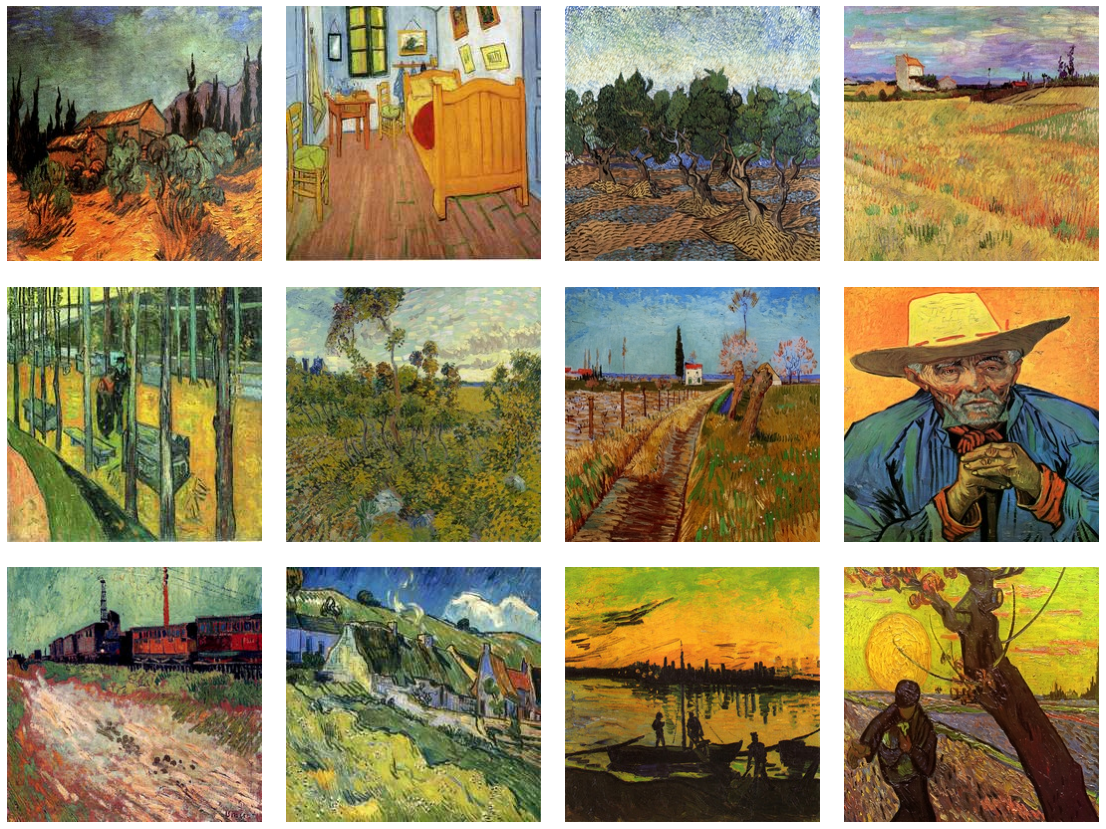

In [10]:
fig = plt.figure(1,figsize=(20,15))
columns = 4
rows = 3
for i in range(rows*columns):
    num = random.randint(2,300)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(immg.open(monet_files[num]))
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()

## Test mages to be Transformed

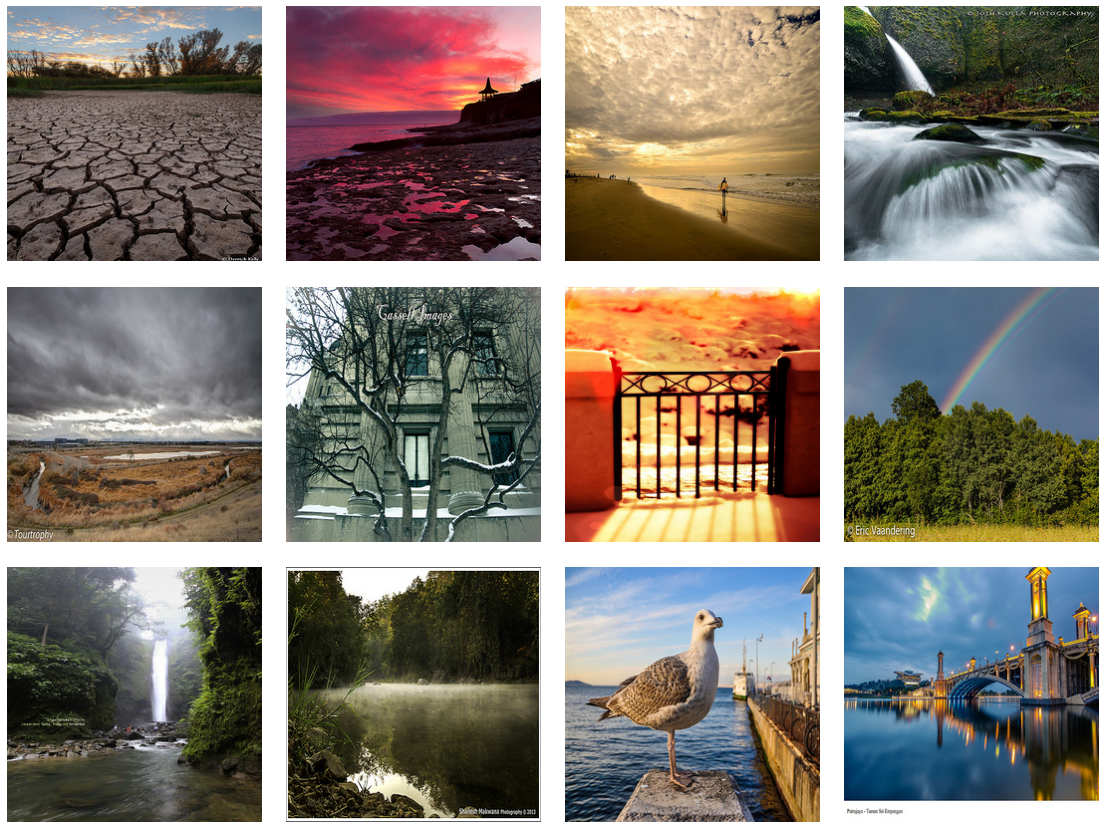

In [11]:
fig = plt.figure(1,figsize=(20,15))
columns = 4
rows = 3
for i in range(rows*columns):
    num = random.randint(2,300)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(immg.open(photo_files[num]))
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()

## Data Block for CycleGAN

In [13]:
dls = get_dls( photo , vangogh ,load_size=256,crop_size=256)

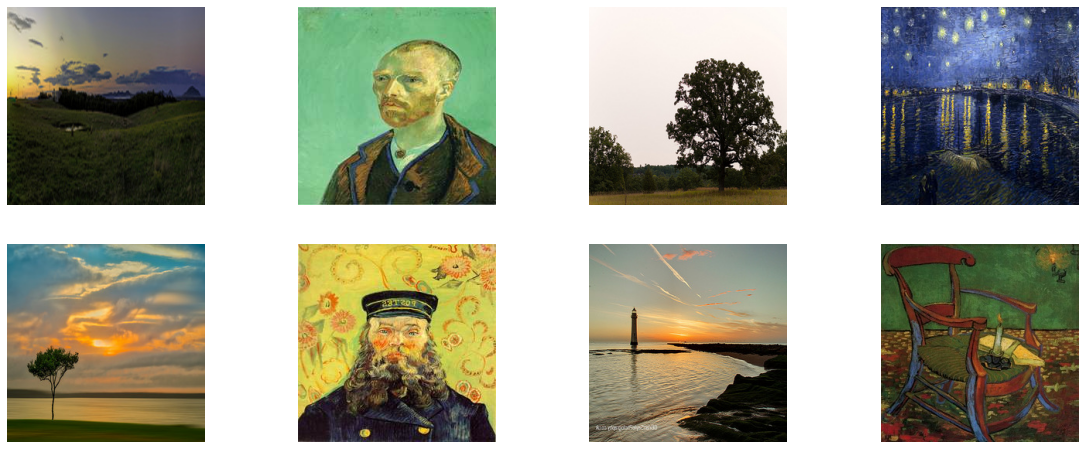

In [14]:
dls.show_batch(figsize=(20,8))

# Create a learner

In [15]:
cycle_gan = CycleGAN(3,3,64, gen_blocks=9)
learn = cycle_learner(dls, cycle_gan,opt_func=partial(Adam,mom=0.5,sqr_mom=0.999))

* Let's find a optimal learning rate

In [17]:
learn.lr_find()

RuntimeError: DataLoader worker (pid(s) 11780, 20916) exited unexpectedly

In [18]:
gc.collect()

19322

## Training

In [19]:
learn.fit_flat_lin(25 ,25 ,1e-3)

RuntimeError: DataLoader worker (pid(s) 15196, 5856) exited unexpectedly

In [ ]:
#os.mkdir('/kaggle/working/models') if os.path.exists('/kaggle/working/models')!=True else print('folder already exits')
#shutil.copyfile('/kaggle/input/monet-saved-model/models/photo2monet.pth','/kaggle/working/models/photo2monet.pth')

In [ ]:
#learn.load('photo2monet');

In [ ]:
learn.save('photo2vangogh');

In [ ]:
learn.recorder.plot_loss(with_valid=False)

## Let's take one batch see results

### Take one batch and make predicion

In [ ]:
b = dls.train.one_batch()
_,_,preds = learn.get_preds(dl=[b], with_decoded=True)

## Let's see the results

# Original Pictures

In [ ]:
dls.show_batch((b[0], b[1]), max_n=8, show=True,figsize=(20,8))

# Style Transfered

In [ ]:
dls.show_batch((preds[1],preds[0]), max_n=8, show=True,figsize=(20,6))

### Work in Progress Stay Tuned...................

## Making Predictions

In [ ]:
os.mkdir('/kaggle/working/images')

In [ ]:
pred_path = '/kaggle/working/images'
test_path = '/kaggle/input/gan-getting-started/photo_jpg'

In [ ]:
def get_preds_cycleGAN(learn,test_path,pred_path,bs=4,num_workers=4,suffix='png'):
    """
    A prediction function that takes the Learner object `learn` with the trained model, 
    the `test_path` folder with the images to perform batch inference on, 
    and the output folder `pred_path` where the predictions will be saved, 
    with a batch size `bs`, `num_workers`,
    and suffix of the prediction images `suffix` (default='png').
    """

    assert os.path.exists(test_path)

    if not os.path.exists(pred_path):
        os.mkdir(pred_path)

    test_dl = load_dataset(test_path,bs,num_workers)
    model = learn.model.G_B.cuda()
    for i, xb in tqdm.tqdm(enumerate(test_dl),total=len(test_dl)):
        fn, im = xb
        preds = (model(im.cuda())/2 + 0.5)
        for i in range(len(fn)):
            new_fn = os.path.join(pred_path,'.'.join([os.path.basename(fn[i]).split('.')[0]+'',suffix]))
            torchvision.utils.save_image(preds[i],new_fn)

In [ ]:
get_preds_cycleGAN(learn,test_path,pred_path,suffix='jpg')

### zip images folder

In [ ]:
shutil.make_archive('images','zip','/kaggle/working/images')

In [ ]:
ts = get_image_files(pred_path);

## Predicted Images

In [ ]:
fig = plt.figure(1,figsize=(20,10))
columns = 4
rows = 3
for i in range(rows*columns):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(immg.open(ts[i]))
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()

In [ ]:
for j in range(len(ts)):
    os.remove(str(ts[j]))
os.remove('/kaggle/working/models/photo2monet.pth')
os.rmdir('/kaggle/working/images')
os.rmdir('/kaggle/working/models')